<a href="https://colab.research.google.com/github/ejrtks1020/Deep_learning_library/blob/main/_3_3_%EC%BC%80%EB%9D%BC%EC%8A%A4_Fashion_MNIST_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 케라스 Fashion MNIST 모델

<img src="https://www.tensorflow.org/tutorials/keras/classification_files/output_oZTImqg_CaW1_0.png?hl=ko" width="500">

<sub>출처: https://www.tensorflow.org/tutorials/keras/classification?hl=ko</sub>

### modules import


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import models
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')


### 데이터셋 로드

In [ ]:
tf.random.set_seed(111)

(x_train_full, y_train_full), (x_test, y_test) = load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size = 0.3,
                                                  random_state= 111 )

### 데이터 확인

In [ ]:
print('학습데이터: {}\t레이블: {}'.format(x_train_full.shape, y_train_full.shape))
print('학습데이터: {}\t레이블: {}'.format(x_train.shape, y_train.shape))
print('검증데이터: {}\t레이블: {}'.format(x_val.shape, y_val.shape))
print('테스트데이터: {}\t레이블: {}'.format(x_test.shape, y_test.shape))

학습데이터: (60000, 28, 28)	레이블: (60000,)
학습데이터: (42000, 28, 28)	레이블: (42000,)
검증데이터: (18000, 28, 28)	레이블: (18000,)
테스트데이터: (10000, 28, 28)	레이블: (10000,)


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
class_names[y_train[0]]

'Pullover'

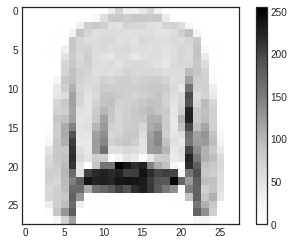

In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

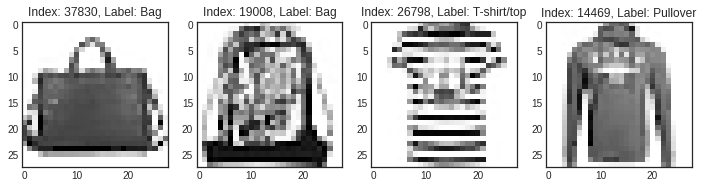

In [ ]:
num_sample = 4 

random_idx = np.random.randint(60000, size = num_sample)

plt.figure(figsize = (12, 6))
for i, idx in enumerate(random_idx):
  image = x_train_full[idx, :]
  label = y_train_full[idx]
  plt.subplot(1, len(random_idx), i + 1)
  plt.imshow(image)
  plt.title('Index: {}, Label: {}'.format(idx, class_names[label]))

### 데이터 전처리
- Normalization

- flatten

- loss='sparse_categorical_crossentropy'

In [ ]:
x_train = (x_train.reshape(-1, 28 *28)) / 255.
x_val = (x_val.reshape(-1, 28 * 28)) / 255.
x_test = (x_test.reshape(-1, 28 * 28)) / 255.

### 모델 구성 (함수형 API)

In [ ]:
input = Input(shape = (28 * 28,), name = 'input')
hidden1 = Dense(256, activation = 'relu', name = 'hidden1')(input)
hidden2 = Dense(128, activation = 'relu', name ='hidden2')(hidden1)
hidden3 = Dense(64, activation = 'relu', name ='hidden3')(hidden2)
hidden4 = Dense(32, activation = 'relu', name ='hidden4')(hidden3)
output = Dense(10, activation = 'softmax', name ='output')(hidden4)

model = Model( inputs= [input], outputs = [output])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
hidden1 (Dense)              (None, 256)               200960    
_________________________________________________________________
hidden2 (Dense)              (None, 128)               32896     
_________________________________________________________________
hidden3 (Dense)              (None, 64)                8256      
_________________________________________________________________
hidden4 (Dense)              (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_____________________________________________________

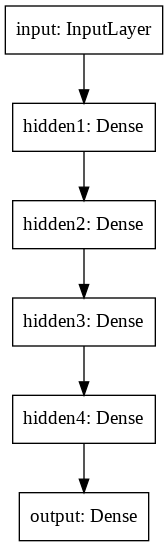

In [ ]:
plot_model(model)

### 모델 컴파일

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = RMSprop(learning_rate=0.01),
              metrics = ['acc']) # 다중분류문제 -> sparse_categorical_crossentropy사용

### 모델 학습
- 모델 시각화를 위해 history라는 변수에 학습 과정을 담음

In [ ]:
history = model.fit(x_train, y_train,
                    epochs =10,
                    batch_size = 128,
                    validation_data = (x_val, y_val))

Epoch 1/10
329/329 [==============================] - 3s 7ms/step - loss: 0.9925 - acc: 0.6951 - val_loss: 0.6769 - val_acc: 0.7683
Epoch 2/10
329/329 [==============================] - 2s 7ms/step - loss: 0.5450 - acc: 0.8026 - val_loss: 0.5997 - val_acc: 0.8125
Epoch 3/10
329/329 [==============================] - 2s 7ms/step - loss: 0.4896 - acc: 0.8245 - val_loss: 0.5656 - val_acc: 0.8304
Epoch 4/10
329/329 [==============================] - 2s 7ms/step - loss: 0.4660 - acc: 0.8364 - val_loss: 0.6758 - val_acc: 0.7469
Epoch 5/10
329/329 [==============================] - 2s 7ms/step - loss: 0.4547 - acc: 0.8440 - val_loss: 0.5408 - val_acc: 0.8405
Epoch 6/10
329/329 [==============================] - 2s 7ms/step - loss: 0.4561 - acc: 0.8464 - val_loss: 0.6373 - val_acc: 0.8104
Epoch 7/10
329/329 [==============================] - 2s 6ms/step - loss: 0.4445 - acc: 0.8499 - val_loss: 1.1487 - val_acc: 0.6671
Epoch 8/10
329/329 [==============================] - 2s 7ms/step - loss: 0.

### 학습 결과 시각화

In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

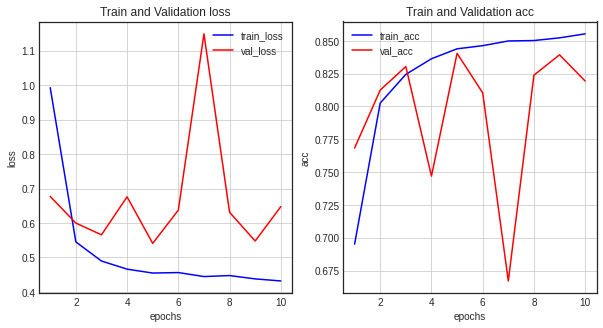

In [ ]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color ='blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color ='red', label = 'val_loss')
ax1.set_title('Train and Validation loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color ='blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color ='red', label = 'val_acc')
ax2.set_title('Train and Validation acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.grid()
ax2.legend()

plt.show()

### 다른 옵티마이저로 실행
- 아래의 과정 다시 실행
  - 데이터셋 로드
  - 데이터 전처리
  - 모델 구성


In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = SGD(learning_rate=0.01),
              metrics = ['acc'])

In [ ]:
history2 = model.fit(x_train, y_train, epochs= 10,
                     batch_size = 128,
                     validation_data = (x_val, y_val))

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f0cce7db7a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


329/329 [==============================] - 33s 101ms/step - loss: 0.3455 - acc: 0.8763 - val_loss: 0.4504 - val_acc: 0.8698
Epoch 2/10
329/329 [==============================] - 2s 7ms/step - loss: 0.3278 - acc: 0.8791 - val_loss: 0.4506 - val_acc: 0.8639
Epoch 3/10
329/329 [==============================] - 2s 6ms/step - loss: 0.3214 - acc: 0.8817 - val_loss: 0.4361 - val_acc: 0.8707
Epoch 4/10
329/329 [==============================] - 2s 6ms/step - loss: 0.3164 - acc: 0.8824 - val_loss: 0.4639 - val_acc: 0.8503
Epoch 5/10
329/329 [==============================] - 2s 6ms/step - loss: 0.3149 - acc: 0.8824 - val_loss: 0.4259 - val_acc: 0.8704
Epoch 6/10
329/329 [==============================] - 2s 6ms/step - loss: 0.3130 - acc: 0.8828 - val_loss: 0.4380 - val_acc: 0.8688
Epoch 7/10
329/329 [==============================] - 2s 5ms/step - loss: 0.3113 - acc: 0.8829 - val_loss: 0.4273 - val_acc: 0.8701
Epoch 8/10
329/329 [==============================] - 2s 6ms/step - loss: 0.3096 - a

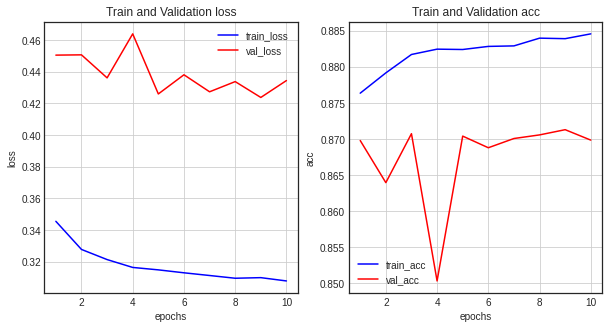

In [ ]:
history_dict = history2.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color ='blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color ='red', label = 'val_loss')
ax1.set_title('Train and Validation loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color ='blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color ='red', label = 'val_acc')
ax2.set_title('Train and Validation acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.grid()
ax2.legend()

plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.5096 - acc: 0.8609


[0.5095710754394531, 0.8608999848365784]

### 모델 평가 (1)
- optimizer: SGD()로 학습한 모델

- evaluate

In [ ]:
pred_ys = model.predict(x_test)

print(pred_ys.shape)
np.set_printoptions(precision = 7)
print(pred_ys[0])


(10000, 10)
[8.5232790e-18 2.9257264e-23 8.2036541e-22 5.1235511e-26 1.9247250e-18
 3.6050843e-03 4.2762898e-16 7.2216645e-02 3.6837182e-14 9.2417824e-01]


### 학습된 모델을 통해 값 예측

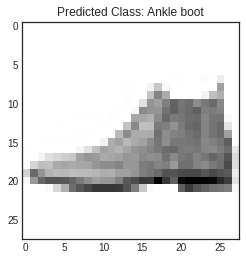

In [ ]:
arg_pred_y = np.argmax(pred_ys , axis = 1)
plt.imshow(x_test[0].reshape(-1, 28))
plt.title('Predicted Class: {}'.format(class_names[arg_pred_y[0]]))
plt.show()

In [ ]:
def plot_image(i, pred_ys, y_test, img):
  pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]
  plt.grid(False)
  plt.xticks([]) #눈금 제거
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary) #흑백 컬러맵

  predicted_label = np.argmax(pred_ys)
  if predicted_label == y_test:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                       100 * np.max(pred_ys),
                                       class_names[y_test]),
                                       color = color)
  
def plot_value_array(i, pred_ys, true_label):
  pred_ys, true_label = pred_ys[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), pred_ys, color = '#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(pred_ys)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


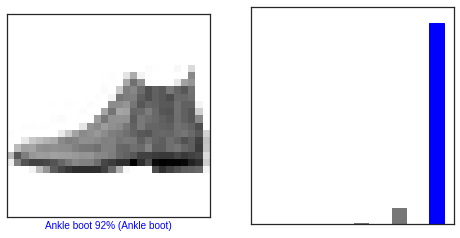

In [ ]:
i = 0
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_value_array(i ,pred_ys, y_test)
plt.show()

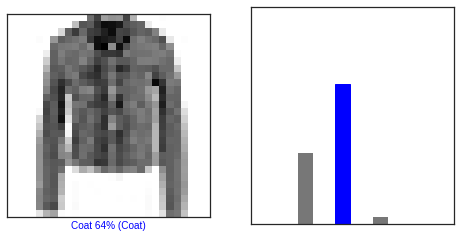

In [ ]:
i = 10
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_value_array(i ,pred_ys, y_test)
plt.show()

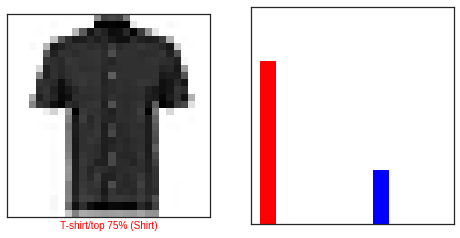

In [ ]:
i = 40
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_value_array(i ,pred_ys, y_test)
plt.show()

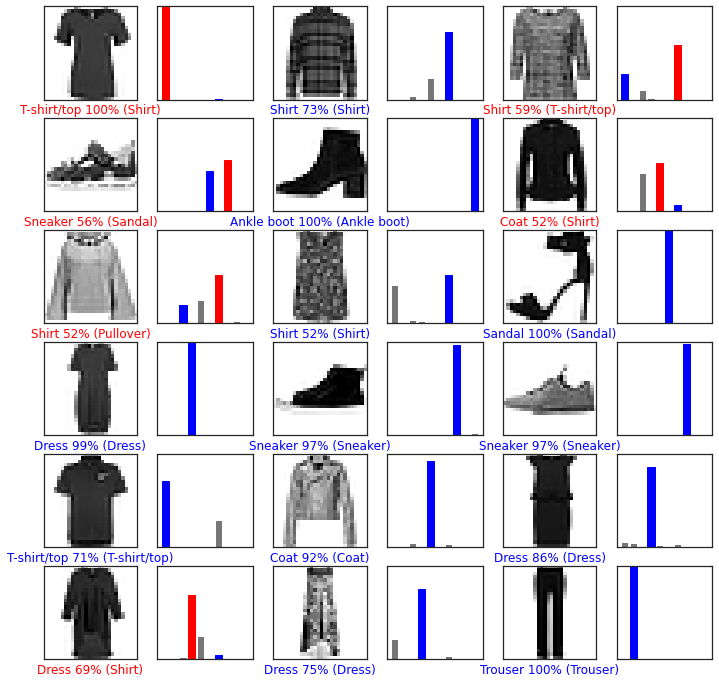

In [ ]:
num_rows = 6
num_cols = 3
num_images = num_rows *num_cols
random_num = np.random.randint(10000, size =num_images)
plt.figure(figsize = (2*2*num_cols, 2 * num_rows))

for idx, num in enumerate(random_num):
  plt.subplot(num_rows, num_cols * 2 , 2 * idx + 1)
  plot_image(num, pred_ys, y_test, x_test.reshape(-1 ,28, 28))
  plt.subplot(num_rows, num_cols * 2 , 2 * idx + 2)
  plot_value_array(num, pred_ys, y_test)

plt.show()

### 모델 평가(2)
- optimizer: SGD()로 설정한 모델

- 혼동 행렬 (Confusion Matrix)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set(style = 'white')
from tensorflow.keras.utils import to_categorical

In [ ]:
y_test_che = to_categorical(y_test)
y_test_che.shape

(10000, 10)

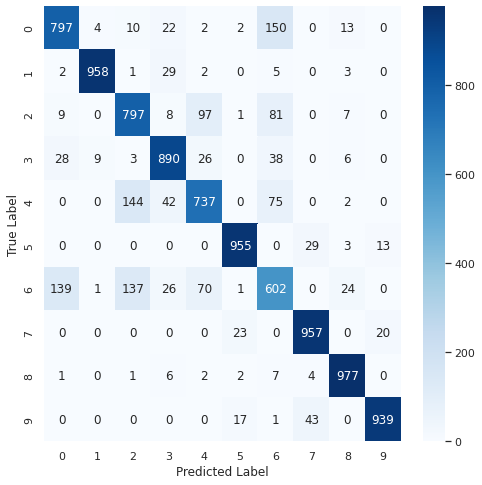

In [ ]:
plt.figure(figsize=(8,8))
cm2 = confusion_matrix(np.argmax(y_test_che, axis = -1), np.argmax(pred_ys, axis =-1))
sns.heatmap(cm2, annot=True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 모델 평가 (3)
- optimizer: SGD()로 설정한 모델

- 분류 보고서

In [ ]:
print(classification_report(np.argmax(y_test_che, axis = -1), np.argmax(pred_ys, axis = -1)))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1000
           1       0.99      0.96      0.97      1000
           2       0.73      0.80      0.76      1000
           3       0.87      0.89      0.88      1000
           4       0.79      0.74      0.76      1000
           5       0.95      0.95      0.95      1000
           6       0.63      0.60      0.61      1000
           7       0.93      0.96      0.94      1000
           8       0.94      0.98      0.96      1000
           9       0.97      0.94      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

